# Forecasting Using ARIMA Models in Python

In this notebook, you will learn to use the powerful ARIMA class models to forecast the future. You will learn how to use the statsmodels package to analyze time series, to build tailored models, and to forecast under uncertainty. How will the stock market move in the next 24 hours? How will the levels of CO2 change in the next decade? How many earthquakes will there be next year? You will learn to solve all these problems and more.

## Table of Contents

- [Introduction](#intro)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc29/"

---
<a id='intro'></a>

<img src="images/ts3_001.png" alt="" style="width: 800px;"/>

<img src="images/ts3_002.png" alt="" style="width: 800px;"/>

<img src="images/ts3_003.png" alt="" style="width: 800px;"/>

<img src="images/ts3_004.png" alt="" style="width: 800px;"/>

<img src="images/ts3_005.png" alt="" style="width: 800px;"/>

<img src="images/ts3_006.png" alt="" style="width: 800px;"/>

<img src="images/ts3_007.png" alt="" style="width: 800px;"/>

<img src="images/ts3_008.png" alt="" style="width: 800px;"/>


## Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

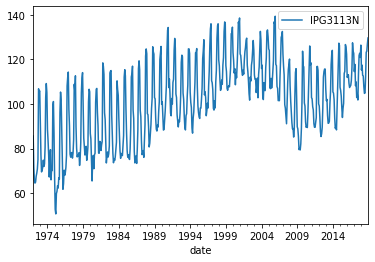

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv(path+'candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show();

Can you tell whether this is a stationary time series or not? How does it change throughout the year and across many years?

In [4]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


## Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. The reason to do this is so that you can test the quality of your model fit when you are done.

Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.

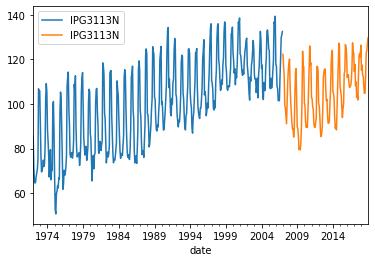

In [5]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show();

Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

## Is it stationary

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use `ARMA models` to predict the next values of the time series. If it is non-stationary then you cannot use `ARMA models`, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

### Question 1

The DataFrame, `df1` is a time series of Amazon stock close price.

Using the console, make a quick plot of this DataFrame using the DataFrame's `.plot()` method and using `plt.show()` to display the plot.

Is `df1`, the stock close price, stationary?

Possible Answers
- No, because df1 has a trend. (correct)
- No, because in df1, the variance changes with time.
- No, in df1, the dynamics change with time.
- Yes, df1 appears to be.

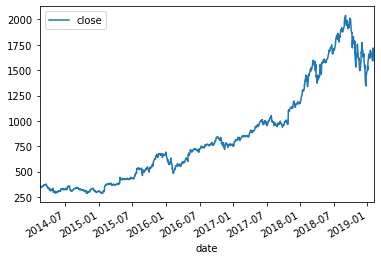

In [8]:
df1 = pd.read_csv(path+'df1.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df1.plot(ax=ax)
plt.show();

### Question2 

The DataFrame, `df2` is a time series of the return (percentage increase of price per day) of Amazon stock.

Make a plot of `df2`. Is `df2`, the stock return, stationary?

Possible Answers
- No, because df2 has a trend.
- No, because in df2, the variance changes with time. (correct)
- No, in df2, the dynamics change with time.
- Yes, df2 appears to be.

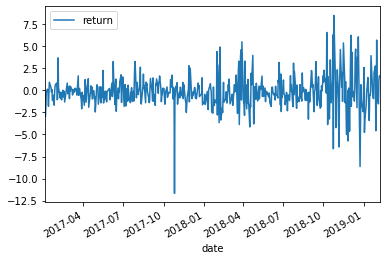

In [9]:
df2 = pd.read_csv(path+'df2.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df2.plot(ax=ax)
plt.show();

### Question 3

The DataFrame, `df3` is a time series showing the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater). Using the console, make a quick plot of this DataFrame.

Make a plot of `df3`. Is `df3`, the number of major earthquakes per year, stationary?

Possible Answers
- No, because df3 has a trend.
- No, because in df3, the variance changes with time.
- No, in df3, the dynamics change with time.
- Yes, df3 appears to be. (correct)

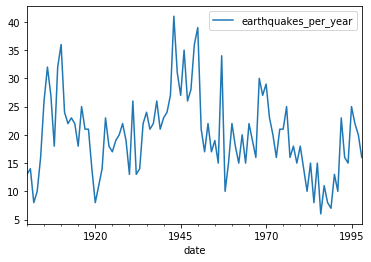

In [10]:
df3 = pd.read_csv(path+'df3.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
df3.plot(ax=ax)
plt.show();

You can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.

In [ ]:
<img src="images/ts3_xxx.png" alt="" style="width: 400px;"/>

In [ ]:
---
<a id='intro'></a>